##
Analytical work by
Basheer Mohammed Alsharabi and Adham Qais Qasim

# Introduction about Data set


Dataset Attributes:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType:chest pain type[TA:Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [
Normal: Normal, 
ST: having ST-T wave abnormality
(T wave inversions and/or ST elevation or depression of > 0.05 mV), 
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved
 [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina 
 [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [
 Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

1- import analysis libraries :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2- Import data

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/DataHeart.csv")

In [ ]:
d.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


3- Check from null value of data

In [ ]:
d.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

4- Check from duplicates of data

In [ ]:
d.duplicated().sum()

0

5- Data Pre-processing and us notes :

In [ ]:

# copyright of dataset and cleaning data
c=d
c=c.replace({'Sex':{'M':1,'F':0}})
c=c.replace({'ChestPainType':{'TA':1,'ATA':2,'NAP':3,'ASY':4}})
c=c.replace({'ExerciseAngina':{'N':0,'Y':1}})#change value ,N=0,Y=1
c=c.replace({'ST_Slope':{'Up':1,'Flat':2,'Down':3}})
c=c.replace({'RestingECG':{'Normal':0,'ST':1,'LVH':3}})
c.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.808279,136.809368,0.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,1.176958,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
d.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:

"""
Notes: 
1- count HeartDisease is 508,
2- age mean of HeartDisease is 55.89
3- ChestPainType mean is 3.64
"""


c[c['HeartDisease']==1].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,0.901575,3.645669,134.185039,175.940945,0.334646,0.856299,127.655512,0.622047,1.274213,1.942913,1.0
std,8.727056,0.298182,0.748727,19.828685,126.391398,0.472332,1.173768,23.386923,0.485354,1.151872,0.497220,0.0
min,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.0
25%,51.000000,1.000000,4.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,1.0
50%,57.000000,1.000000,4.000000,132.000000,217.000000,0.000000,0.000000,126.000000,1.000000,1.200000,2.000000,1.0
75%,62.000000,1.000000,4.000000,145.000000,267.000000,1.000000,1.000000,144.250000,1.000000,2.000000,2.000000,1.0
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,195.000000,1.000000,6.200000,3.000000,1.0


Notes:

In [ ]:
c[c['HeartDisease']==0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.00000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,0.651220,2.763415,130.180488,227.121951,0.107317,0.74878,148.151220,0.134146,0.408049,1.260976,0.0
std,9.444915,0.477167,0.903743,16.499585,74.634659,0.309894,1.17962,23.288067,0.341226,0.699709,0.511663,0.0
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.00000,69.000000,0.000000,-1.100000,1.000000,0.0
25%,43.000000,0.000000,2.000000,120.000000,197.250000,0.000000,0.00000,134.000000,0.000000,0.000000,1.000000,0.0
50%,51.000000,1.000000,3.000000,130.000000,227.000000,0.000000,0.00000,150.000000,0.000000,0.000000,1.000000,0.0
75%,57.000000,1.000000,4.000000,140.000000,266.750000,0.000000,1.00000,165.000000,0.000000,0.600000,1.000000,0.0
max,76.000000,1.000000,4.000000,190.000000,564.000000,1.000000,3.00000,202.000000,1.000000,4.200000,3.000000,0.0


*Note:
from describe about HeartDisease and not HeartDisease .
Columns :ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope.
All the values of these columns benefited, all the people who were more threatened by heart disease.

In [ ]:
f=d[(d['HeartDisease']==1)&(d['ST_Slope']=='Flat')].value_counts().sum()
u=d[(d['HeartDisease']==1)&(d['ST_Slope']=='Up')].value_counts().sum()
w=d[(d['HeartDisease']==1)&(d['ST_Slope']=='Down')].value_counts().sum()
print('Flat=',+f,'\nUp',+u,'\nDown',+w)

Flat= 381 
Up 78 
Down 49


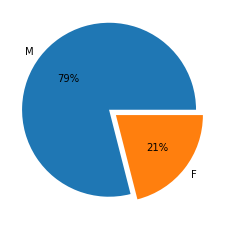

In [ ]:
"""
Note:
Illustration of the ratio of males and females.
The figure shows that the proportion of males is higher than that of females.
"""
lab=d.Sex.value_counts().index
ex=[0.1,0]
size=d.Sex.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,labels=lab)
plt.show()

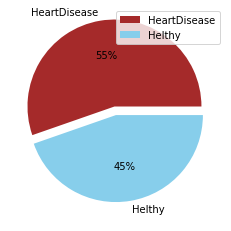

In [ ]:

"""
Note:
Graphic chart showing the proportion of
cases have heart disease and non-cases.

The figure shows that the proportion of cases have heart disease is greater than those that do not.
"""
ex=[0.1,0]
size=d.HeartDisease.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,colors=['Brown','skyblue'],labels=['HeartDisease','Helthy'])
plt.legend()
plt.show()

<Figure size 288x360 with 0 Axes>

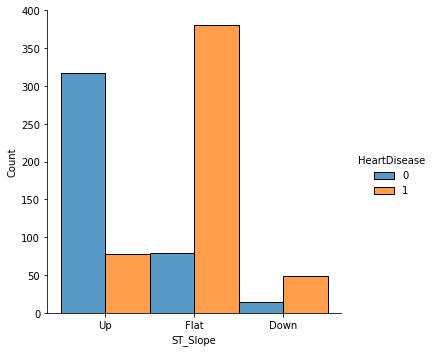

In [ ]:
"""
Notes 
-This Graphic chart showing the relationship between heart disease and the type of ST_Slope the patient has.
-Most cases of heart disease are those have flat type of ST_SLOPE
"""
plt.figure(figsize=(4,5))
sns.displot(data=d,x="ST_Slope",hue="HeartDisease",multiple="dodge")

<Figure size 360x360 with 0 Axes>

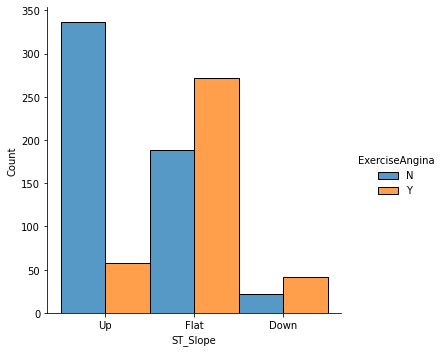

In [ ]:

"""
Notes 
-This Graphic chart showing the relationship between type of ST_Slope and ExerciseAngina.-Most cases of heart disease are those with flat type of ST_SLOPE
-Flat type of ST_SLOPE is highly associated with ExerciseAngina.
"""

#relation 
plt.figure(figsize=(5,5))
sns.displot(data=d,x="ST_Slope",hue="ExerciseAngina",multiple="dodge")

<Figure size 360x360 with 0 Axes>

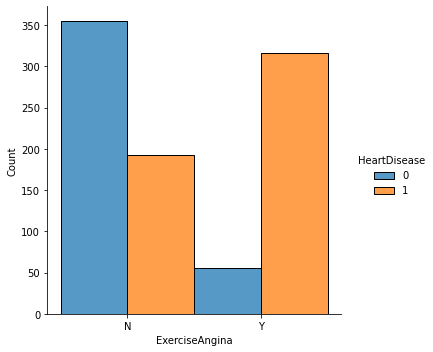

In [ ]:

"""
Notes 
-Most cases have of ExerciseAngina،those have heart disease.
-This Graphic chart showing relation between HeartDisease and ExerciseAngina
"""
plt.figure(figsize=(5,5))
sns.displot(data=d,x="ExerciseAngina",hue="HeartDisease",multiple="dodge")

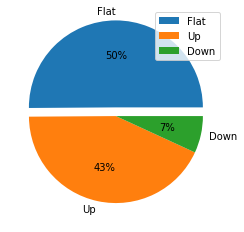

In [ ]:

"""
Notes: 
-Frequency of types of ST_Slope
-The proportion of cases infected ST_SLOPE flat type is the most 50% of the other cases

"""
lab=d.ST_Slope.value_counts().index
ex=[0.1,0,0]
size=d.ST_Slope.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,labels=lab)
plt.legend()
plt.show()

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

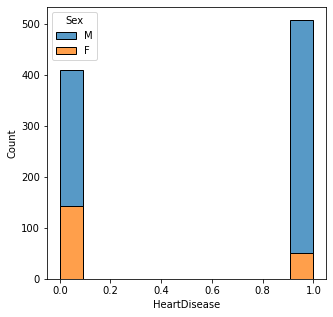

In [ ]:

"""
Notes:
From the graphic chart it is clear that men are the most affected by heart disease.
"""
plt.figure(figsize=(5,5))
sns.histplot(data=d,x="HeartDisease",hue="Sex",multiple="stack")

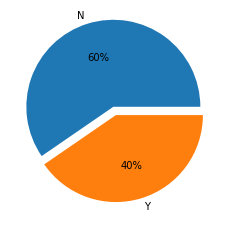

In [ ]:
"""
Notes:
-Graphic chart of ExerciseAngina ratio.
-The proportion of cases affected by ExerciseAngina is 40%
"""
lab=d.ExerciseAngina.value_counts().index
ex=[0.1,0]
size=d.ExerciseAngina.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,labels=lab)
plt.show()

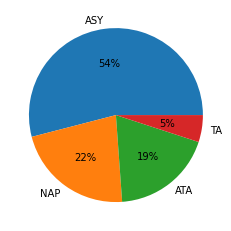

In [ ]:
"""
Notes 
-Illustration of the frequency of the type of ChestPainType
"""
lab=d.ChestPainType.value_counts().index
ex=[0,0,0,0]
size=d.ChestPainType.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,labels=lab)
plt.show()

<Figure size 360x360 with 0 Axes>

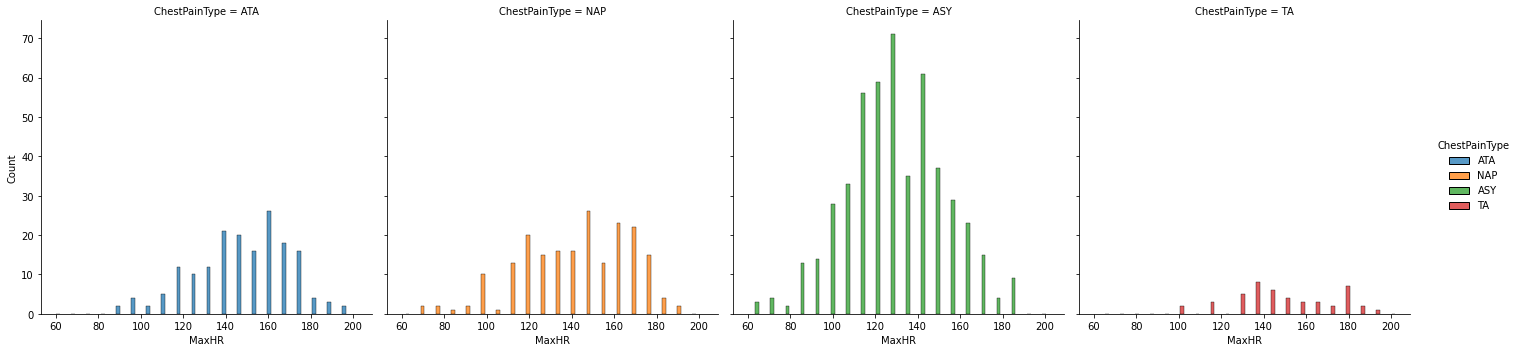

In [ ]:

"""
Notes:
The Cases with a MaxHR frequency greater than 97 to 166
They get angina without symptoms.
"""
plt.figure(figsize=(5,5))
sns.displot(data=d,x="MaxHR",hue="ChestPainType",col='ChestPainType',multiple="dodge")

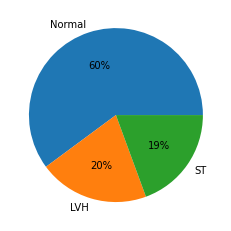

In [ ]:
"""
Graphic chart showing percentage of RestingECG cases
"""

lab=d.RestingECG.value_counts().index
ex=[0,0,0]
size=d.RestingECG.value_counts().values
plt.pie(size,autopct='%1.f%%',explode=ex,labels=lab)
plt.show()

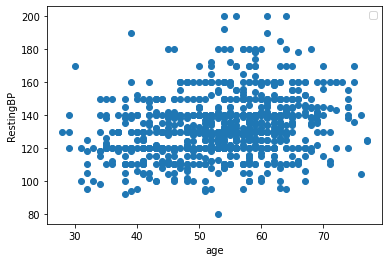

In [ ]:

 #drop rows by index
G=d.drop([449])
plt.scatter(G.Age,G.RestingBP)
plt.xlabel('age')
plt.ylabel('RestingBP')
plt.legend()
plt.show()